<a href="https://colab.research.google.com/github/sanggusti/fisher-eater/blob/main/fisher_eater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1>Fisher Eater</h1>
</center>

<p align=center>Exploratory and Model Inference from Fish Feeder Dataset for Binary Classification purpose.</p>

### Unzip data

In [1]:
!unzip "FAB15.zip"

Archive:  FAB15.zip
  inflating: 051.csv                 
  inflating: 101.csv                 
  inflating: 102.csv                 
  inflating: 103.csv                 
  inflating: 161.csv                 
  inflating: 162.csv                 
  inflating: 163.csv                 


### EDA

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

bin
boot
content
datalab
dev
etc
home
lib
lib32
lib64
media
mnt
opt
proc
python-apt
root
run
sbin
srv
sys
tensorflow-1.15.2
tmp
tools
usr
var



In [3]:
data_1 = pd.read_csv("051.csv")
data_1.head()

,x,y,z,label
0,3,239,34,1
1,9,247,30,1
2,8,252,31,1
3,0,255,37,1
4,-12,252,39,1


## Checking for data imbalances

In [9]:
label_1 =  data_1[(data_1['label']==1)]
label_0 =  data_1[(data_1['label']==0)]
print("In data 051, Data with label of 0 is " + str(len(label_0)) + " data")
print("In data 051, Data with label of 1 is " + str(len(label_1)) + " data")

In data 051, Data with label of 0 is 2600 data
In data 051, Data with label of 1 is 2600 data


In [8]:
data_2 = pd.read_csv("101.csv")
data_3 = pd.read_csv("102.csv")
data_4 = pd.read_csv("103.csv")
data_5 = pd.read_csv("161.csv")
data_6 = pd.read_csv("162.csv")
data_7 = pd.read_csv("163.csv")

In [30]:
def check_imbalances(data):
    label_0 = data[(data['label']==0)]
    label_1 = data[(data['label']==1)]
    print("Data with label of 0 is " + str(len(label_0)) + " data")
    print("Data with label of 1 is " + str(len(label_1)) + " data")
    print("\n")

In [31]:
# check imbalances for each data
print("Data 101.csv")
check_imbalances(data_2)
print("Data 102.csv")
check_imbalances(data_3)
print("Data 103.csv")
check_imbalances(data_4)
print("Data 161.csv")
check_imbalances(data_5)
print("Data 162.csv")
check_imbalances(data_6)
print("Data 163.csv")
check_imbalances(data_7)

Data 101.csv
Data with label of 0 is 2288 data
Data with label of 1 is 2288 data


Data 102.csv
Data with label of 0 is 1872 data
Data with label of 1 is 1872 data


Data 103.csv
Data with label of 0 is 2756 data
Data with label of 1 is 2756 data


Data 161.csv
Data with label of 0 is 1820 data
Data with label of 1 is 1820 data


Data 162.csv
Data with label of 0 is 1456 data
Data with label of 1 is 1456 data


Data 163.csv
Data with label of 0 is 1404 data
Data with label of 1 is 1404 data




<p align=center>Conclusion: Data is clean and the labelling is balanced.</p>


## Plotting experiment

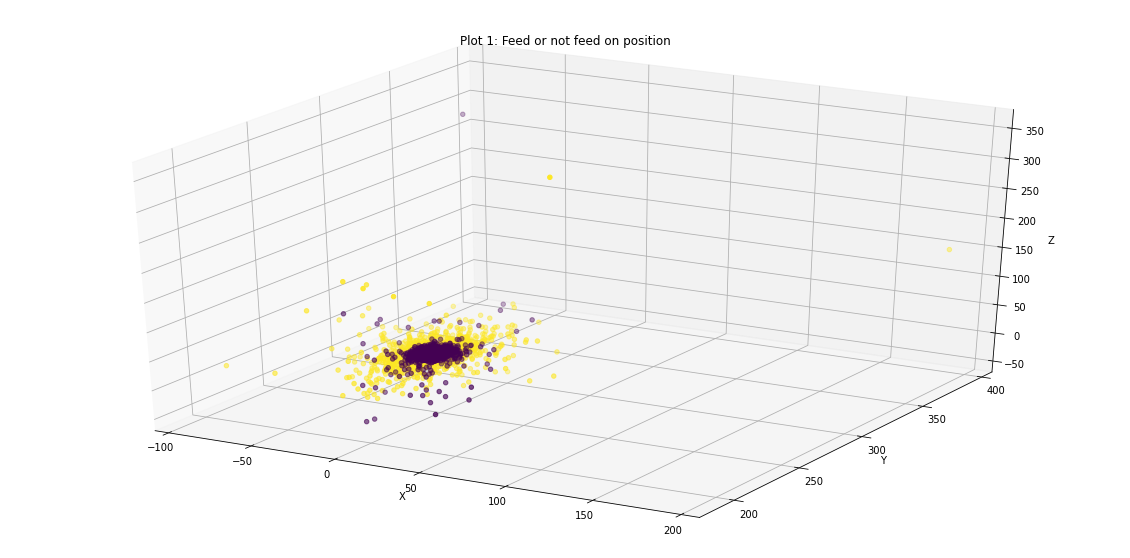

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
x = data_1["x"]
y = data_1["y"]
z = data_1["z"]
c = data_1["label"]
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('X')
_ = ax.set_ylabel('Y')
_ = ax.set_zlabel('Z')
_ = plt.title("Plot 1: Feed or not feed on position")
plt.show()

In [22]:
class CFG:
    img_dim1 = 20
    img_dim2 = 10

In [23]:
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

In [25]:
# Make the plotting as a function

def feeding_plot(data, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = "3d")
    x = data["x"]
    y = data["y"]
    z = data["z"]
    c = data["label"]
    _ = ax.scatter(xs=x, ys=y, zs=z, c=c)
    _ = ax.set_xlabel('X')
    _ = ax.set_ylabel('Y')
    _ = ax.set_zlabel('Z')
    _ = plt.title(title)
    plt.show()

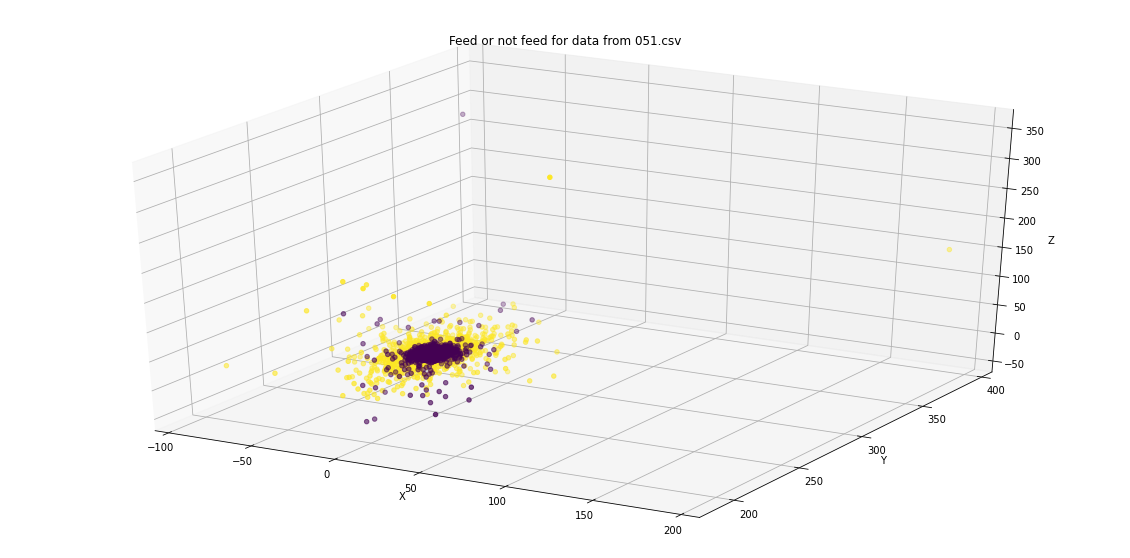

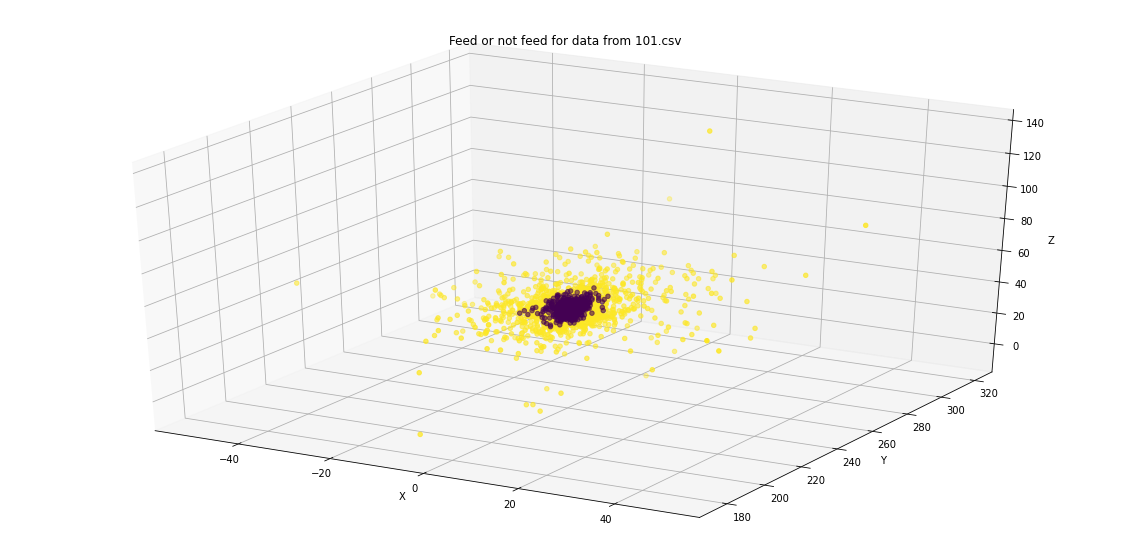

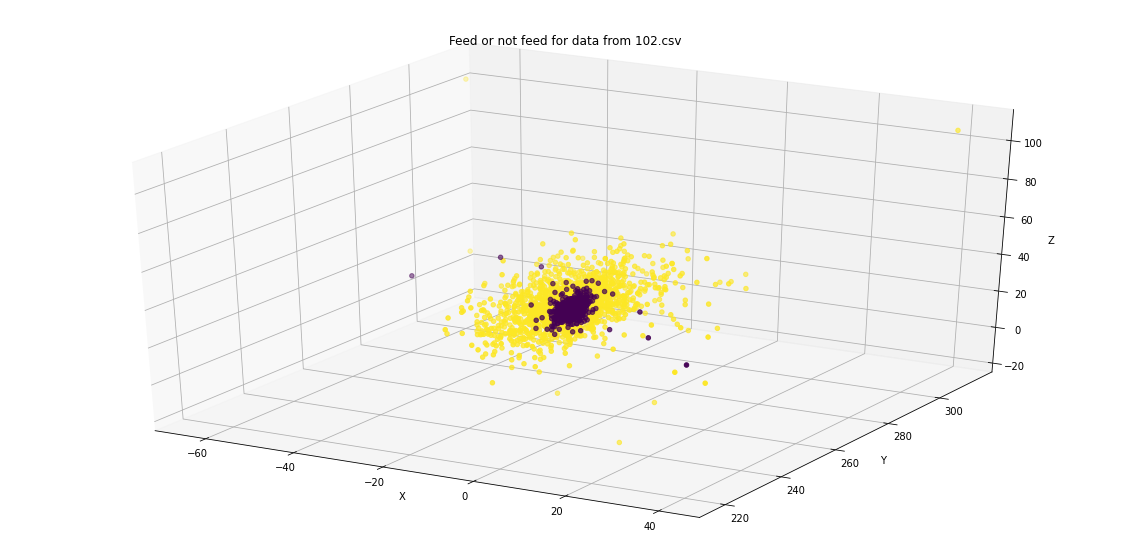

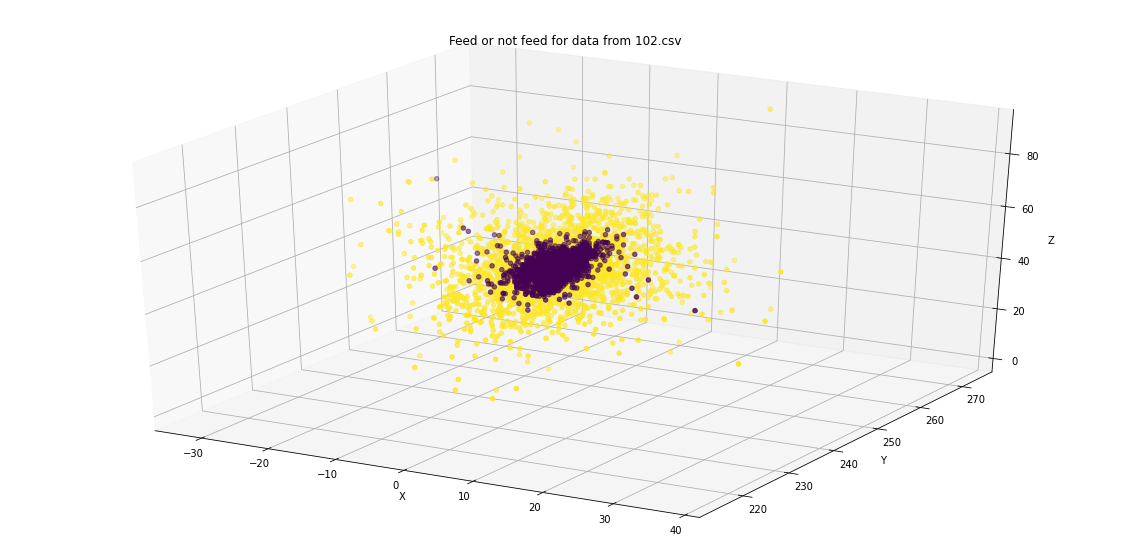

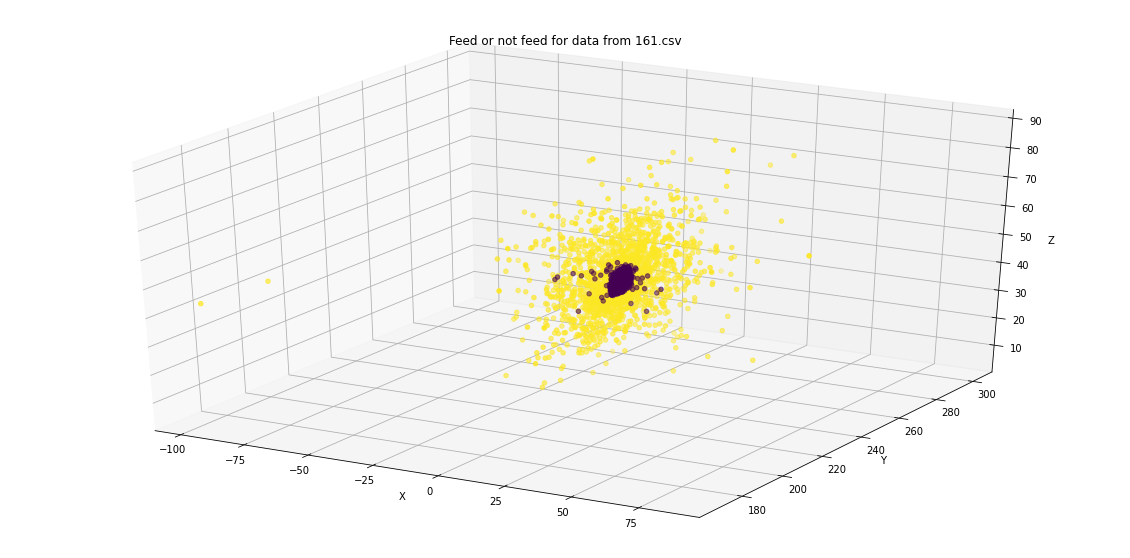

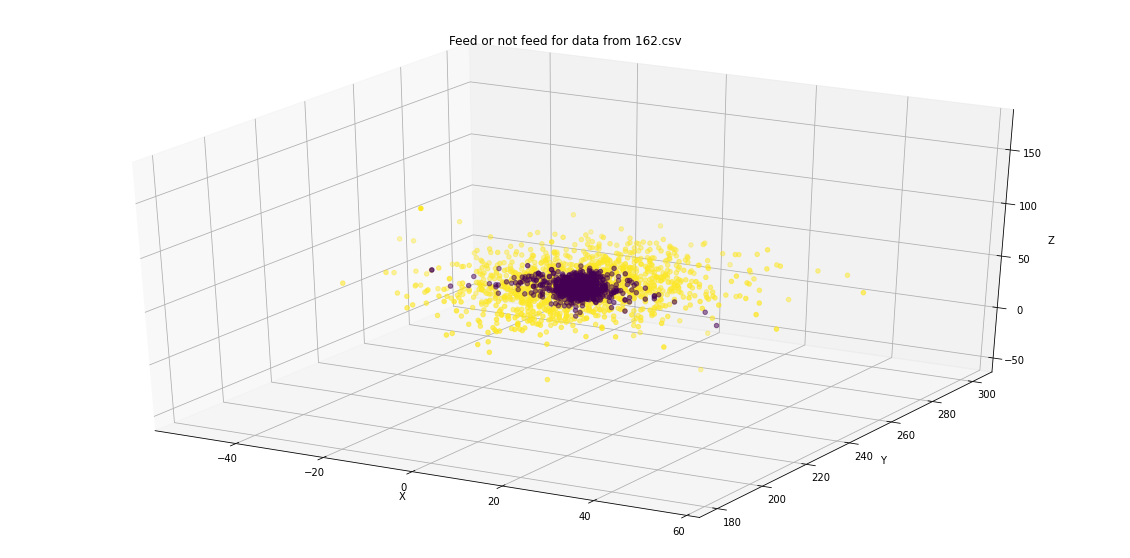

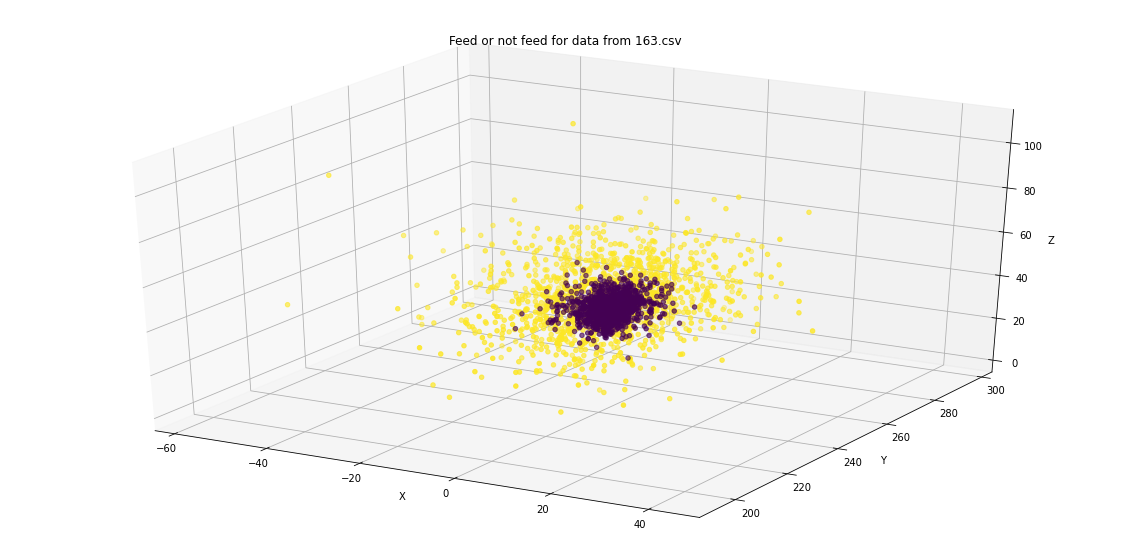

In [26]:
feeding_plot(data_1, "Feed or not feed for data from 051.csv")
feeding_plot(data_2, "Feed or not feed for data from 101.csv")
feeding_plot(data_3, "Feed or not feed for data from 102.csv")
feeding_plot(data_4, "Feed or not feed for data from 102.csv")
feeding_plot(data_5, "Feed or not feed for data from 161.csv")
feeding_plot(data_6, "Feed or not feed for data from 162.csv")
feeding_plot(data_7, "Feed or not feed for data from 163.csv")

### Fancier Plot

In [ ]:
import plotly.express as px


df = data_1
fig = px.scatter_3d(
      df, 
      x="x", 
      y="y", 
      z="z", 
      color="label",
      # symbol="label", 
      opacity = 0.9,
      title = "Eat or not eat data_1"
    )
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

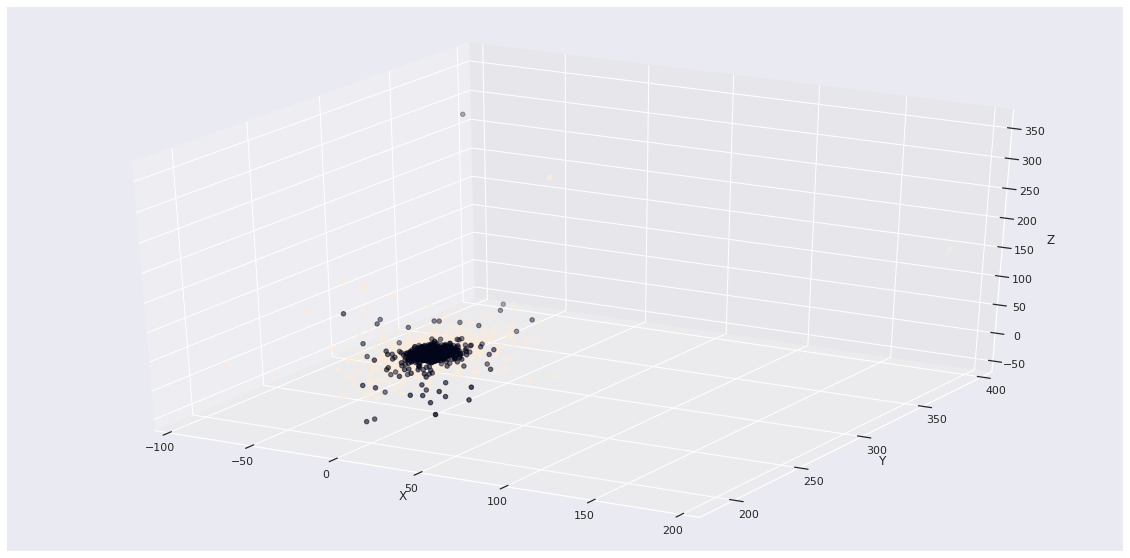

In [36]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = data_1
sns.set(style = 'darkgrid')

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['x']
y = df['y']
z = df['z']
c = df['label']

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(x, y, z, c=c*255)
plt.show()


We could get information of the data *feed*(`label 1`) with yellow and *not feed*(`label 2`) with blue.

From the visualization of the data, we could witness the feed distribution would look like a spherical layers where the average distribution of the sphere would had a certain amount of depth to get separate labels, in this case the *yellow* tend to in outer of *blue*. On this we could do several approach on solving this problem:

- Clustering
- Binary Classification

We would look at both approach in the next segment.

### Feature Extraction

Since the variable are points from coordinate axises, to make sure we could deliver inference with it, we need to deliver the variable data to dataframe with multivariate approach.

In [41]:
# experimentation on data_1, build the dataframe for predictors (x,y,z) and target (label)

data_experiment = data_1
data_valid = data_experiment.values[int(data_experiment.shape[0]*0.8):,:]
data_train = data_experiment.values[:int(data_experiment.shape[0]*0.8),:]
data_test = data_valid[int(data_valid.shape[0]*0.5):,:]
data_valid = data_valid[:int(data_valid.shape[0]*0.5),:]

data_train.shape, data_valid.shape, data_test.shape

((4160, 4), (520, 4), (520, 4))

In [45]:
predictors = data_experiment.loc[:, ['x','y','z']]
target = data_experiment.loc[:,['label']]

In [46]:
def create_predictors_target(data):
    """
    A separation of column of dataframe into Predictors and Target for training purpose
    Param:
        data: DataFrame
    Output:
        predictors, target: predictors and label separation ready for training purpose
    """
    predictors = data.loc[:, ['x','y','z']]
    target = data.loc[:, ['label']]
    return predictors, target

In [47]:
def dataloader(data):
    """
    Separate data into data for training, test and validation
    Param:
      data: DataFrame
    Ouput:
      data_train, data_test, data_valid
    """
    data_valid = data.values[int(data.shape[0]*0.8):,:]
    data_train = data.values[:int(data.shape[0]*0.8),:]
    data_test = data_valid[int(data_valid.shape[0]*0.5):,:]
    data_valid = data_valid[:int(data_valid.shape[0]*0.5),:]
    return data_train, data_test, data_valid

In [48]:
# Random forest experimentation on data_1
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier


RF = RandomForestClassifier(
        n_estimators=100,
        max_depth=2,
        random_state=0
    )
RF.fit(predictors, target)
RF.predict(predictors)
print(round(RF.score(predictors, target), 4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.716
